# Mehrdimensionale Differentialrechnung - Übungen

In [3]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import sympy as sp
from mpl_toolkits.mplot3d.axes3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


## Aufgaben

### Aufgabe MD1: Wärmeleitungsgleichung

Zeigen Sie, dass die Temperaturfunktion
$T(x,t)= \frac{1}{\sqrt{t}}e^{-\frac{x^2}{4t}}$
die Wärmeleitungsgleichung
$\frac{\partial T}{\partial t}(x,t)= \frac{\partial^2 T}{\partial x^2}(x,t)$
erfüllt.

### Aufgabe MD2: Ableitung, Differential und lineare Approximation

1. Berechnen Sie die Jacobimatrix $f'(x,y,z)$ der Funktion 
$f:\mathbb{R}^3 \rightarrow\mathbb{R}^2: f(x, y, z)=\begin{pmatrix} \cos(x - z) \\ 4z + x y \end{pmatrix}$.
2. Berechnen Sie das Differential der Funktion 
$f:\mathbb{R}^2 \rightarrow\mathbb{R}: z(x, y) = e^{-(3x^2 + y^2)}$ allgemein und im Speziellen bei $(x_0, y_0)=(1,2)$. Wie groß ist der Unterschied zwischen der linearen Approximation der Funktionswertdifferenz $\text{d}z$ und der wahren Funktionswertdifferenz $\Delta z$ bei $(x_0, y_0)$, wenn $\text{d}x = 0.1$ und $\text{d}y = -0.2$?

### Aufgabe MD3: Partielle Ableitungen

1. **Ideales Gas:** Das Volumen $V$ einer bestimmten Menge eines idealen Gases ist durch die Temperatur $T$ und den Druck $p$ über die Formel $V = 0.08\frac{T}{p}$ gegeben. Berechnen und interpretieren Sie $\frac{\partial V}{\partial p}$ und $\frac{\partial V}{\partial T}$ bei $p = 20$ und $T = 300$.
2. **Öffentlicher Personennahverkehr:** In einer Vorstadt haben Pendler die Möglichkeit mit dem Bus oder mit dem Zug in das Stadtzentrum zu kommen. Die Nachfrage nach diesen Verkehrsarten variiert mit ihrer Kosten. Sei $B(b, z)$ die Anzahl der Menschen, die mit dem Bus fahren wird, wenn $b$ der Preis für den Bus und $z$ der Preis der Zug sind. Zum Beispiel: Bei $B(4, 6) = 7000$ nehmen 7000 Pendler den Bus, wenn der Preis den Bus $4$ ist und der Preis für den Zug $6$ ist. Erklären Sie, warum $\frac{\partial B}{\partial b} <0$ und $\frac{\partial B}{\partial z}> 0$ gelten.

### Aufgabe MD4: Wärmeverlustfunktion - Teil 1

Ein rechteckiges Industriegebäude habe die Länge $x$, die Breite $y$ und die Höhe $z$. In der Tabelle ist der Wärmeverlust pro Tag durch jede Seite des Gebäudes in geeigneten Energieeinheiten pro Quadratmeter Seitenfläche angegeben. 

| Dach | Ostseite | Westseite | Nordseite | Südseite | Boden |
|------|----------|-----------|-----------|----------|-------|
| 10   | 8        | 6         | 10        | 5        | 1     |

Der gesamte tägliche Wärmeverlust des Gebäudes sei mit Sei $Q(x, y, z)$ bezeichnet.

1. Finden Sie eine Formel für $Q(x, y, z)$.
2. Geben Sie den gesamten täglichen Wärmeverlust an, wenn das Gebäude 30 Meter lang, 12 Meter breit und 9 Meter hoch ist.
3. Berechnen und interpretieren Sie $\frac{\partial Q}{\partial x} (30, 12, 9)$, $\frac{\partial Q}{\partial y}(30, 12, 9)$ und $\frac{\partial Q}{\partial z} (30, 12, 9)$.

### Aufgabe MD5: Differential

Die Höhe über Meeresspiegel eines Kraters sei gegeben durch die Funktion $z(x,y) = \sqrt{x^2 + 4y^2}$ mit $x, y, z$ in Kilometern.
Die Temperatur in Fahrenheit sie gegeben durch $T(x,y) = 100 + 2x -\frac{1}{4}x^2y^2$.

1. Berechnen Sie $\text{d}z$ und $\text{d}T$ allgemein und speziell am Punkt $p=(3, 2)$.
2. Berechnen Sie die Gleichung der Tangentialebene an den Krater im Punkt $p$.
3. In welche Richtung steigt die Temperatur am Punkt $p$ am stärksten an?
4. Wie stark ändert sich am Punkt $p$ die Temperatur pro Höhe, wenn man in die Richtung von Aufgabe 3 geht?

## Lösungen

### Lösung MD1: Wärmeleitungsgleichung

$\frac{\partial T}{\partial t}(x,t)$ berechnet sich mittels Produkt- und Kettenregel zu $e^{-\frac{x^2}{4t}}\left( -\frac{1}{2\sqrt{t^3}} + \frac{x^2}{4\sqrt{t^5}} \right)$.
$\frac{\partial T}{\partial x}(x,t)$ berechnet sich mittels Kettenregel zu $-\frac{1}{2\sqrt{t^3}}xe^{-\frac{x^2}{4t}}$ und daraus berechnet sich $\frac{\partial^2 T}{\partial x^2}(x,t)$ mittels Produkt- und Kettenregel zu $e^{-\frac{x^2}{4t}}\left( -\frac{1}{2\sqrt{t^3}} + \frac{x^2}{4\sqrt{t^5}} \right)$, sodass $\frac{\partial T}{\partial t}(x,t)= \frac{\partial^2 T}{\partial x^2}(x,t)$
erfüllt ist.

In [4]:
# using sympy:
sp.init_printing() 

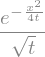

In [5]:
x, t = sp.symbols('x t')
T = 1/sp.sqrt(t)*sp.exp(-x**2/(4*t))
T

In [6]:
sp.simplify( sp.diff(T, t) - sp.diff(T, x, 2) )

In [7]:
sp.init_printing(False)

### Lösung MD2: Ableitung, Differential und lineare Approximation

1. $f'(x,y,z) = \begin{pmatrix} \frac{\partial}{\partial x}\cos(x - z) & \frac{\partial}{\partial y}\cos(x - z) & \frac{\partial}{\partial z} \cos(x - z) \\ \frac{\partial}{\partial x}(4z + x y) & \frac{\partial}{\partial y}(4z + x y) & \frac{\partial}{\partial z}(4z + x y) \end{pmatrix} = \begin{pmatrix}-\sin(x-z) & 0 & \sin(x-z) \\ y & x & 4 \end{pmatrix}$

2. $\text{d}z = \frac{\partial z}{\partial x}\text{d}x + \frac{\partial z}{\partial y} \text{d}y = e^{-(3x^2 + y^2)}(-6x) \text{d}x + e^{-(3x^2 + y^2)}(-2y) \text{d}y$, 
  $\Delta z (1,2) = e^{-(3(1.1)^2 + (1.8)^2)} - e^{-(3(1)^2 + (2)^2)}$,
  $\text{d}z (1,2) = e^{-7}(-6) 0.1 + e^{-7}(-4) (-0.2)$.
  Siehe Code:

In [8]:
def z(x, y):
    return exp(-(3*x**2 + y**2))

def dz(x_0, y_0, dx, dy): 
    return -exp(-(3*x_0**2 + y_0**2))*6*x_0*dx - exp(-(3*x_0**2 + y_0**2))*2*y_0*dy

x_0 =  1
y_0 =  2
dx  =  0.1
dy  = -0.2

print("wahre Differenz =\n {:.10f}".format( z(x_0 + dx, y_0 + dy) - z(x_0, y_0) ))
print("linear approximierte Differenz =\n {:.10f}".format( dz(x_0, y_0, dx, dy) ) )

wahre Differenz =
 0.0001265951
linear approximierte Differenz =
 0.0001823764


### Lösung MD3: Partielle Ableitungen

1. $\frac{\partial V}{\partial p}(p,T) = -0.08\frac{T}{p^2}$ und $\frac{\partial V}{\partial T}(p,T) = 0.08\frac{1}{p}$. Daher ist $\frac{\partial V}{\partial p}(20, 300) = -0{,}06$ (Volumen wird kleiner bei steigendem Druck und gleichbleibender Temperatur) und $\frac{\partial V}{\partial T}(20, 300) = 0{,}004$ (Volumen wird größer bei steigender Temperatur und gleichbleibendem Druck)
2. $\frac{\partial B}{\partial b} <0$ weil steigende Buspreise bei gleichbleibenden Zugpreisen zu weiniger Verwendern der Busse führen, und $\frac{\partial B}{\partial z}> 0$ weil umgekehrt steigende Zugpreise bei gleichbleibenden Buspreisen zu mehr Verwendern der Busse führen.

### Lösung MD4: Wärmeverlustfunktion - Teil 1

1. $Q(x,y,z) = 10xy + 8yz + 6yz + 10xz + 5xz + 1xy = 11xy + 14yz + 15xz$
2. $Q(30, 12, 9)$, siehe Code
3. Siehe Code

In [9]:
def Q(x,y,z):
    return 11*x*y + 14*y*z + 15*x*z

def Q_x(x,y,z):
    return 11*y + 15*z

def Q_y(x,y,z):
    return 11*x + 14*z

def Q_z(x,y,z):
    return 14*y + 15*x

x_0 = 30
y_0 = 12
z_0 =  9

print("gesamter täglicher Wärmeverlust        = {:8.2f}".format(Q(x_0, y_0, z_0)))
print("Wärmeverlust pro Meter Längenänderung  = {:8.2f}".format(Q_x(x_0, y_0, z_0)))
print("Wärmeverlust pro Meter Breitenänderung = {:8.2f}".format(Q_y(x_0, y_0, z_0)))
print("Wärmeverlust pro Meter Höhennänderung  = {:8.2f}".format(Q_z(x_0, y_0, z_0)))

gesamter täglicher Wärmeverlust        =  9522.00
Wärmeverlust pro Meter Längenänderung  =   267.00
Wärmeverlust pro Meter Breitenänderung =   456.00
Wärmeverlust pro Meter Höhennänderung  =   618.00


### Lösung MD5: Differential

1. $\text{d}z = \frac{x}{\sqrt{x^2 + 4y^2}}\text{d}x + \frac{4y}{\sqrt{x^2 + 4y^2}}\text{d}y$, bei $p$ gilt $\text{d}z = 0.6\text{d}x + 1.6\text{d}y$. $\text{d}T = (2 - 0.5xy^2)\text{d}x - 0.5x^2y\text{d}y$, bei $p$ gilt $\text{d}T = -4\text{d}x - 9 \text{d}y$.
2. $z - z(3,2) = 0.6(x - 3) + 1.6 (y - 2)$ liefert $5z = 3x + 8y$
3. $v = \text{grad}(T)(p) = (-4,-9)^T$, vgl. bei $p$ gilt $\text{d}T = -4\text{d}x - 9 \text{d}y$.
4. Bei $p$ ist $\frac{\text{d}T(v)}{\text{d}z(v)} = \frac{-4\cdot(-4) - 9\cdot(-9)}{0.6\cdot(-4) + 1.6\cdot(-9)} = -5.77$ F/km

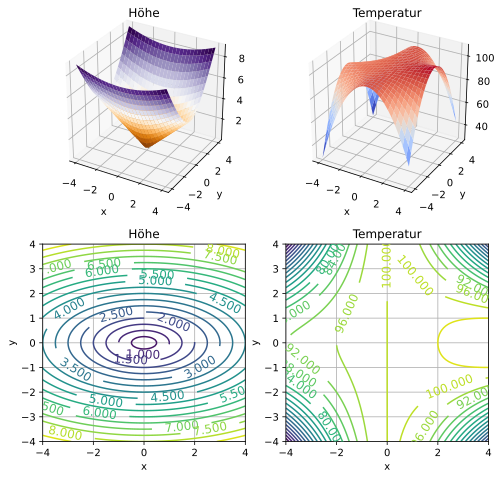

In [10]:
x = linspace(-4, 4, 100)
y = linspace(-4, 4, 100)
X, Y = meshgrid(x, y)

Z = sqrt(X**2 + 4*Y**2)
T = 100 + 2*X  - 0.25*X**2*Y**2

fig = figure(figsize=(8, 8),dpi=30)
ax  = fig.add_subplot(2, 2, 1, projection='3d')
p   = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0, cmap=cm.PuOr)
ax.view_init(azim = -60,elev = 30)
xlabel('x')
ylabel('y')
title('Höhe')

fig.add_subplot(2, 2, 3)
CS = contour(X,Y,Z, 20)
clabel(CS, inline=1, fontsize=12)
xlabel('x')
ylabel('y')
title('Höhe')
grid(True)

ax  = fig.add_subplot(2, 2, 2, projection='3d')
p   = ax.plot_surface(X, Y, T, rstride=4, cstride=4, linewidth=0, cmap=cm.coolwarm)
ax.view_init(azim = -60,elev = 30)
xlabel('x')
ylabel('y')
title('Temperatur')

fig.add_subplot(2, 2, 4)
CS = contour(X, Y, T, 20)
clabel(CS, inline=1, fontsize=12)
xlabel('x')
ylabel('y')
title('Temperatur')
grid(True)

## Kurztestfragen

1. Berechnen Sie das Differential der Funktion $f(x,y,z) = x^2\cos(xz)$.
2. Warum ist der Gradient einer Funktion im rechten Winkel auf deren Konturlinien? 
3. Berechnen Sie das Differential der Funktion $f(x,y) = xe^{-xy}$.
4. Berechnen Sie den Gradienten der Funktion $f(x,y) = y\sin(x - y)$.
5. Gegeben die Funktion $f(x,y,z) = \begin{pmatrix} xyz \\ xy + yz \end{pmatrix}$. Berechnen Sie die Jacobi Matrix dieser Funktion.
6. Gegeben die Funktion $f(x,y,z) = \begin{pmatrix} x+yz \\ xy + z \end{pmatrix}$. Berechnen Sie die Jacobi Matrix dieser Funktion.
7. Berechnen Sie die Jacobimatrix der Funktion $f(x,y,t)=\left(\begin{array}{c c} e^{-0.3t} \cos(x) \\ x^2 y^3 \end{array}\right)$.
8. Berechnen Sie das totale Differential der Funktion $f(x,y)=4x^2+y^2$. Werten Sie dieses Differential im Punkt $(1,2)$ aus. Berechnen Sie die Gleichung der Tangentialebene an die Funktion im Punkt $(1,2)$.
9. Erklären Sie anhand einer Skizze den Unterschied zwischen der wahren Funktionsdifferenz $\Delta y$ und der linearen Approximation (totales Differential) $\text{d}y$ einer eindimensionalen Funktion.
10. Zeigen Sie, dass $u(x,t) = \sin(2x - \frac{5}{6}t)$ die partielle Differentialgleichung $5\frac{\partial u}{\partial x} + 12\frac{\partial u}{\partial t} = 0$ erfüllt.
11. Die Anzahl an verkauften Tickets $T$ einer Sportveranstaltung hängt vom Preis $e$ sowie der Popularität $p$ dieser Veranstaltung ab. Interpretieren Sie in diesem Kontext, weshalb $\frac{\partial T}{\partial e}<0$ und $\frac{\partial T}{\partial p}>0$ sind.

## Programmierprojekte